In [1]:
import  pandas as pd

In [18]:
data = pd.read_excel("Online Retail.xlsx")

In [9]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [21]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [24]:
data['totalprice']=data['Quantity'] *data['UnitPrice']

In [25]:
data['totalprice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: totalprice, Length: 541909, dtype: float64

In [37]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
reference_date=data['InvoiceDate'].max()+pd.Timedelta(days=1)

rfm = data.groupby('CustomerID').agg({
    'InvoiceDate':[
        lambda x:(reference_data-x.max()).days,
        lambda x:(x.max()-x.min()).days
    ],
    'InvoiceNo': 'nunique',
    'totalprice': [
        'sum',
        lambda x: x.sum()/x.nunique()
    ]
        })
rfm.columns=['Recency','Tenure','Frequency','Monetary','AvgOrderValue']
rfm=rfm.reset_index()
print(rfm.head())

   CustomerID  Recency  Tenure  Frequency  Monetary  AvgOrderValue
0     12346.0      326       0          2      0.00       0.000000
1     12347.0        2     365          7   4310.00      76.964286
2     12348.0       75     282          4   1797.24     112.327500
3     12349.0       19       0          1   1757.55      41.846429
4     12350.0      310       0          1    334.40      37.155556


In [38]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue
0,12346.0,326,0,2,0.00,0.000000
1,12347.0,2,365,7,4310.00,76.964286
2,12348.0,75,282,4,1797.24,112.327500
3,12349.0,19,0,1,1757.55,41.846429
4,12350.0,310,0,1,334.40,37.155556
...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000
4368,18281.0,181,0,1,80.82,20.205000
4369,18282.0,8,118,3,176.60,16.054545
4370,18283.0,4,333,16,2094.88,27.206234


In [39]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     4372 non-null   float64
 1   Recency        4372 non-null   int64  
 2   Tenure         4372 non-null   int64  
 3   Frequency      4372 non-null   int64  
 4   Monetary       4372 non-null   float64
 5   AvgOrderValue  4372 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 205.1 KB


In [42]:
r_labels = range(1,6)
rfm['R_Score'] = pd.qcut(rfm['Recency'],q=5, labels=r_labels,duplicates='drop')

f_bins = pd.qcut(rfm['Frequency'],q=5,duplicates='drop')
f_labels = range(1,len(f_bins.cat.categories)+1)
rfm['F_Score'] = pd.qcut(rfm['Frequency'],q=5,labels=f_labels,duplicates='drop')

m_bins = pd.qcut(rfm['Monetary'],q=5,duplicates='drop')
m_labels = range(1,len(m_bins.cat.categories)+1)
rfm['M_Score'] = pd.qcut(rfm['Monetary'],q=5,labels=m_labels,duplicates= 'drop')

print(rfm.head())

   CustomerID  Recency  Tenure  Frequency  Monetary  AvgOrderValue R_score  \
0     12346.0      326       0          2      0.00       0.000000       5   
1     12347.0        2     365          7   4310.00      76.964286       1   
2     12348.0       75     282          4   1797.24     112.327500       4   
3     12349.0       19       0          1   1757.55      41.846429       2   
4     12350.0      310       0          1    334.40      37.155556       5   

  R_Score F_Score M_Score  
0       5       1       1  
1       1       3       5  
2       4       2       4  
3       2       1       4  
4       5       1       2  


In [43]:
rfm['RFM_Segment']=rfm['R_Score'].astype(str)+rfm['F_Score'].astype(str)+rfm['M_Score'].astype(str)

In [44]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_score,R_Score,F_Score,M_Score,RFM_Segment
0,12346.0,326,0,2,0.00,0.000000,5,5,1,1,511
1,12347.0,2,365,7,4310.00,76.964286,1,1,3,5,135
2,12348.0,75,282,4,1797.24,112.327500,4,4,2,4,424
3,12349.0,19,0,1,1757.55,41.846429,2,2,1,4,214
4,12350.0,310,0,1,334.40,37.155556,5,5,1,2,512
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000,5,5,1,1,511
4368,18281.0,181,0,1,80.82,20.205000,5,5,1,1,511
4369,18282.0,8,118,3,176.60,16.054545,1,1,2,1,121
4370,18283.0,4,333,16,2094.88,27.206234,1,1,4,5,145


In [45]:
rfm_backup=rfm.copy()

In [46]:
rfm_backup

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_score,R_Score,F_Score,M_Score,RFM_Segment
0,12346.0,326,0,2,0.00,0.000000,5,5,1,1,511
1,12347.0,2,365,7,4310.00,76.964286,1,1,3,5,135
2,12348.0,75,282,4,1797.24,112.327500,4,4,2,4,424
3,12349.0,19,0,1,1757.55,41.846429,2,2,1,4,214
4,12350.0,310,0,1,334.40,37.155556,5,5,1,2,512
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000,5,5,1,1,511
4368,18281.0,181,0,1,80.82,20.205000,5,5,1,1,511
4369,18282.0,8,118,3,176.60,16.054545,1,1,2,1,121
4370,18283.0,4,333,16,2094.88,27.206234,1,1,4,5,145


In [47]:
def rfm_label(row):
    # Define the conditions to cover all possible combinations
    if row['R_Score'] in [1, 2] and row['F_Score'] in [4, 5] and row['M_Score'] in [4, 5]:
        return 'Best Customers'
    elif row['R_Score'] in [1, 2, 3] and row['F_Score'] in [4, 5] and row['M_Score'] in [3, 4, 5]:
        return 'Loyal Customers'
    elif row['R_Score'] in [1, 2, 3] and row['M_Score'] in [4, 5]:
        return 'Big Spenders'
    elif row['R_Score'] in [4, 5] and row['F_Score'] in [3, 4] and row['M_Score'] in [3, 4]:
        return 'Almost Lost'
    elif row['R_Score'] == 5 and row['F_Score'] in [1, 2] and row['M_Score'] in [1, 2]:
        return 'Lost Customers'
    elif row['R_Score'] in [2, 3] and row['F_Score'] in [3, 4] and row['M_Score'] in [3, 4]:
        return 'Promising Customers'
    elif row['R_Score'] == 4 and row['F_Score'] in [3, 4] and row['M_Score'] in [3, 4]:
        return 'Need Attention'
    elif row['R_Score'] in [1, 2, 3] and row['F_Score'] in [1, 2] and row['M_Score'] in [1, 2]:
        return 'Low Value'
    elif row['R_Score'] in [4, 5] and row['F_Score'] in [1, 2] and row['M_Score'] in [1, 2]:
        return 'Engaged but Not Buying'
    elif row['R_Score'] in [1, 2] and row['F_Score'] in [1, 2] and row['M_Score'] in [3, 4, 5]:
        return 'High Potential'
    elif row['R_Score'] in [4,5] and row['F_Score'] in [1, 2] and row['M_Score'] in [3,4, 5]:
        return 'Infrequent Big Spenders'
    elif row['R_Score'] in [3,4,5] and row['F_Score'] in [3,4, 5] and row['M_Score'] in [3,4, 5]:
        return 'Potentially lost High value customers'
    elif row['R_Score'] in [4, 5] and row['F_Score'] in [4, 5] and row['M_Score'] in [1, 2]:
        return 'Active but Low Spend'
    elif row['R_Score'] in [3] and row['F_Score'] in [1, 2] and row['M_Score'] in [3]:
        return 'Infrequent Moderate Spenders'
    else:
        return 'Other'

# Apply the function to create labels
rfm['RFM_Label'] = rfm.apply(rfm_label, axis=1)

In [48]:
rfm.value_counts('RFM_Label')

RFM_Label
Big Spenders                             741
Low Value                                701
Lost Customers                           655
Best Customers                           581
Infrequent Big Spenders                  535
Engaged but Not Buying                   364
High Potential                           255
Infrequent Moderate Spenders             168
Almost Lost                              106
Loyal Customers                          101
Potentially lost High value customers     60
Promising Customers                       54
Other                                     48
Active but Low Spend                       3
Name: count, dtype: int64

In [65]:
def churn_label(row):
    if row['Recency']>180:
        return 'Churned'
    if row['Recency']>90:
        return 'At risk'
    else:
        return 'Active'


In [66]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_score,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label
0,12346.0,326,0,2,0.00,0.000000,5,5,1,1,511,Lost Customers
1,12347.0,2,365,7,4310.00,76.964286,1,1,3,5,135,Big Spenders
2,12348.0,75,282,4,1797.24,112.327500,4,4,2,4,424,Infrequent Big Spenders
3,12349.0,19,0,1,1757.55,41.846429,2,2,1,4,214,Big Spenders
4,12350.0,310,0,1,334.40,37.155556,5,5,1,2,512,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000,5,5,1,1,511,Lost Customers
4368,18281.0,181,0,1,80.82,20.205000,5,5,1,1,511,Lost Customers
4369,18282.0,8,118,3,176.60,16.054545,1,1,2,1,121,Low Value
4370,18283.0,4,333,16,2094.88,27.206234,1,1,4,5,145,Best Customers


In [67]:
rfm_copy=rfm.copy()

In [68]:
rfm_copy

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_score,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label
0,12346.0,326,0,2,0.00,0.000000,5,5,1,1,511,Lost Customers
1,12347.0,2,365,7,4310.00,76.964286,1,1,3,5,135,Big Spenders
2,12348.0,75,282,4,1797.24,112.327500,4,4,2,4,424,Infrequent Big Spenders
3,12349.0,19,0,1,1757.55,41.846429,2,2,1,4,214,Big Spenders
4,12350.0,310,0,1,334.40,37.155556,5,5,1,2,512,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000,5,5,1,1,511,Lost Customers
4368,18281.0,181,0,1,80.82,20.205000,5,5,1,1,511,Lost Customers
4369,18282.0,8,118,3,176.60,16.054545,1,1,2,1,121,Low Value
4370,18283.0,4,333,16,2094.88,27.206234,1,1,4,5,145,Best Customers


In [69]:
rfm_copy['Churn_Label']=rfm_copy.apply(churn_label,axis=1)

In [70]:
rfm_copy

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_score,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label,Churn_Label
0,12346.0,326,0,2,0.00,0.000000,5,5,1,1,511,Lost Customers,Churned
1,12347.0,2,365,7,4310.00,76.964286,1,1,3,5,135,Big Spenders,Active
2,12348.0,75,282,4,1797.24,112.327500,4,4,2,4,424,Infrequent Big Spenders,Active
3,12349.0,19,0,1,1757.55,41.846429,2,2,1,4,214,Big Spenders,Active
4,12350.0,310,0,1,334.40,37.155556,5,5,1,2,512,Lost Customers,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000,5,5,1,1,511,Lost Customers,Churned
4368,18281.0,181,0,1,80.82,20.205000,5,5,1,1,511,Lost Customers,Churned
4369,18282.0,8,118,3,176.60,16.054545,1,1,2,1,121,Low Value,Active
4370,18283.0,4,333,16,2094.88,27.206234,1,1,4,5,145,Best Customers,Active


In [71]:
churn_counts=rfm_copy['Churn_Label'].value_counts()

In [72]:
churn_counts

Churn_Label
Active     2918
Churned     864
At risk     590
Name: count, dtype: int64

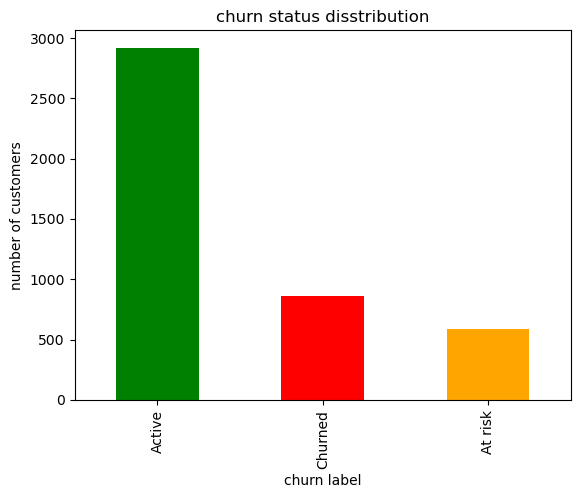

In [73]:
import matplotlib.pyplot as plt

churn_counts.plot(kind='bar' , color=['green','red','orange'])
plt.title('churn status disstribution')
plt.xlabel('churn label')
plt.ylabel('number of customers')
plt.show()